# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
augmented_training_file = 'traffic-signs-data/augmented_train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [75]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
assert len(set(y_train)) == len(set(y_valid)) == len(set(y_test)), "Unique classes accross training, validation and test sets must match"
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# plot somthing like this vor visualization of samples with counts and labes for type 
# https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html

# Counting elements
import collections

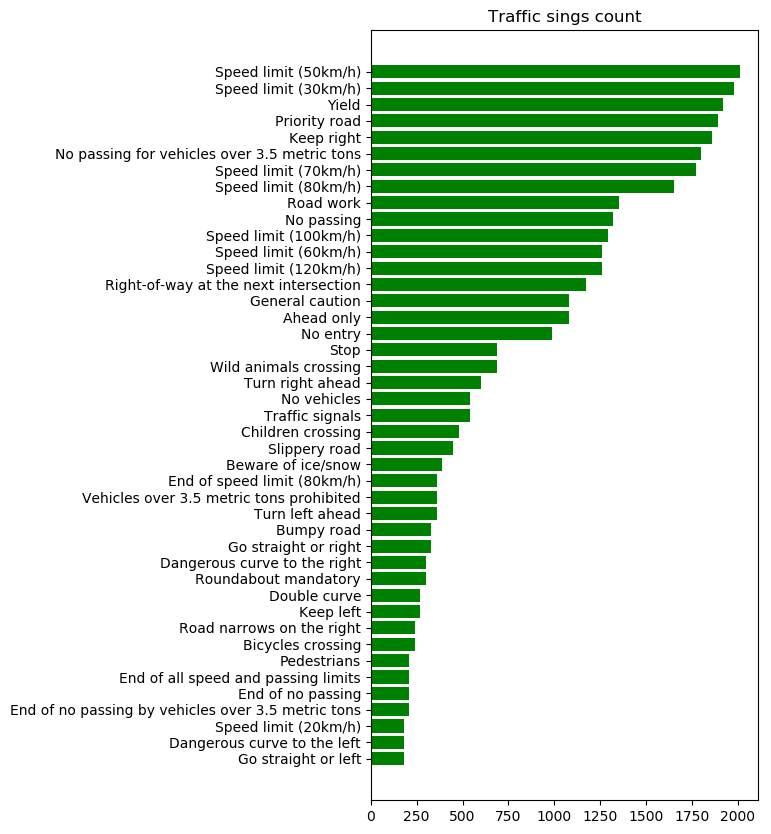

In [6]:
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()
plt.rcParams["figure.figsize"] = (5,10)

fig, ax = plt.subplots()

import csv

with open('traffic-signs-data/signnames.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    signnames_dict = {int(row['ClassId']): row['SignName'] for row in reader}
    

signames_counter=collections.Counter(y_train)
signmaes_data = sorted(signames_counter.items(), key=lambda pair: pair[1], reverse=True)

labels_index = [signnames_dict[x[0]] for x in signmaes_data]
signal_count = [x[1] for x in signmaes_data]


people = labels_index
y_pos = np.arange(len(people))
performance = signal_count

ax.barh(y_pos, performance, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels([x for x in people])
ax.invert_yaxis()  # labels read top-to-bottom
#ax.yaxis.tick_right()
#ax.set_xlabel('Count')
ax.set_title('Traffic sings count')
plt.show()

signals_to_augment = [x[0] for x in signmaes_data if x[1] < 700]


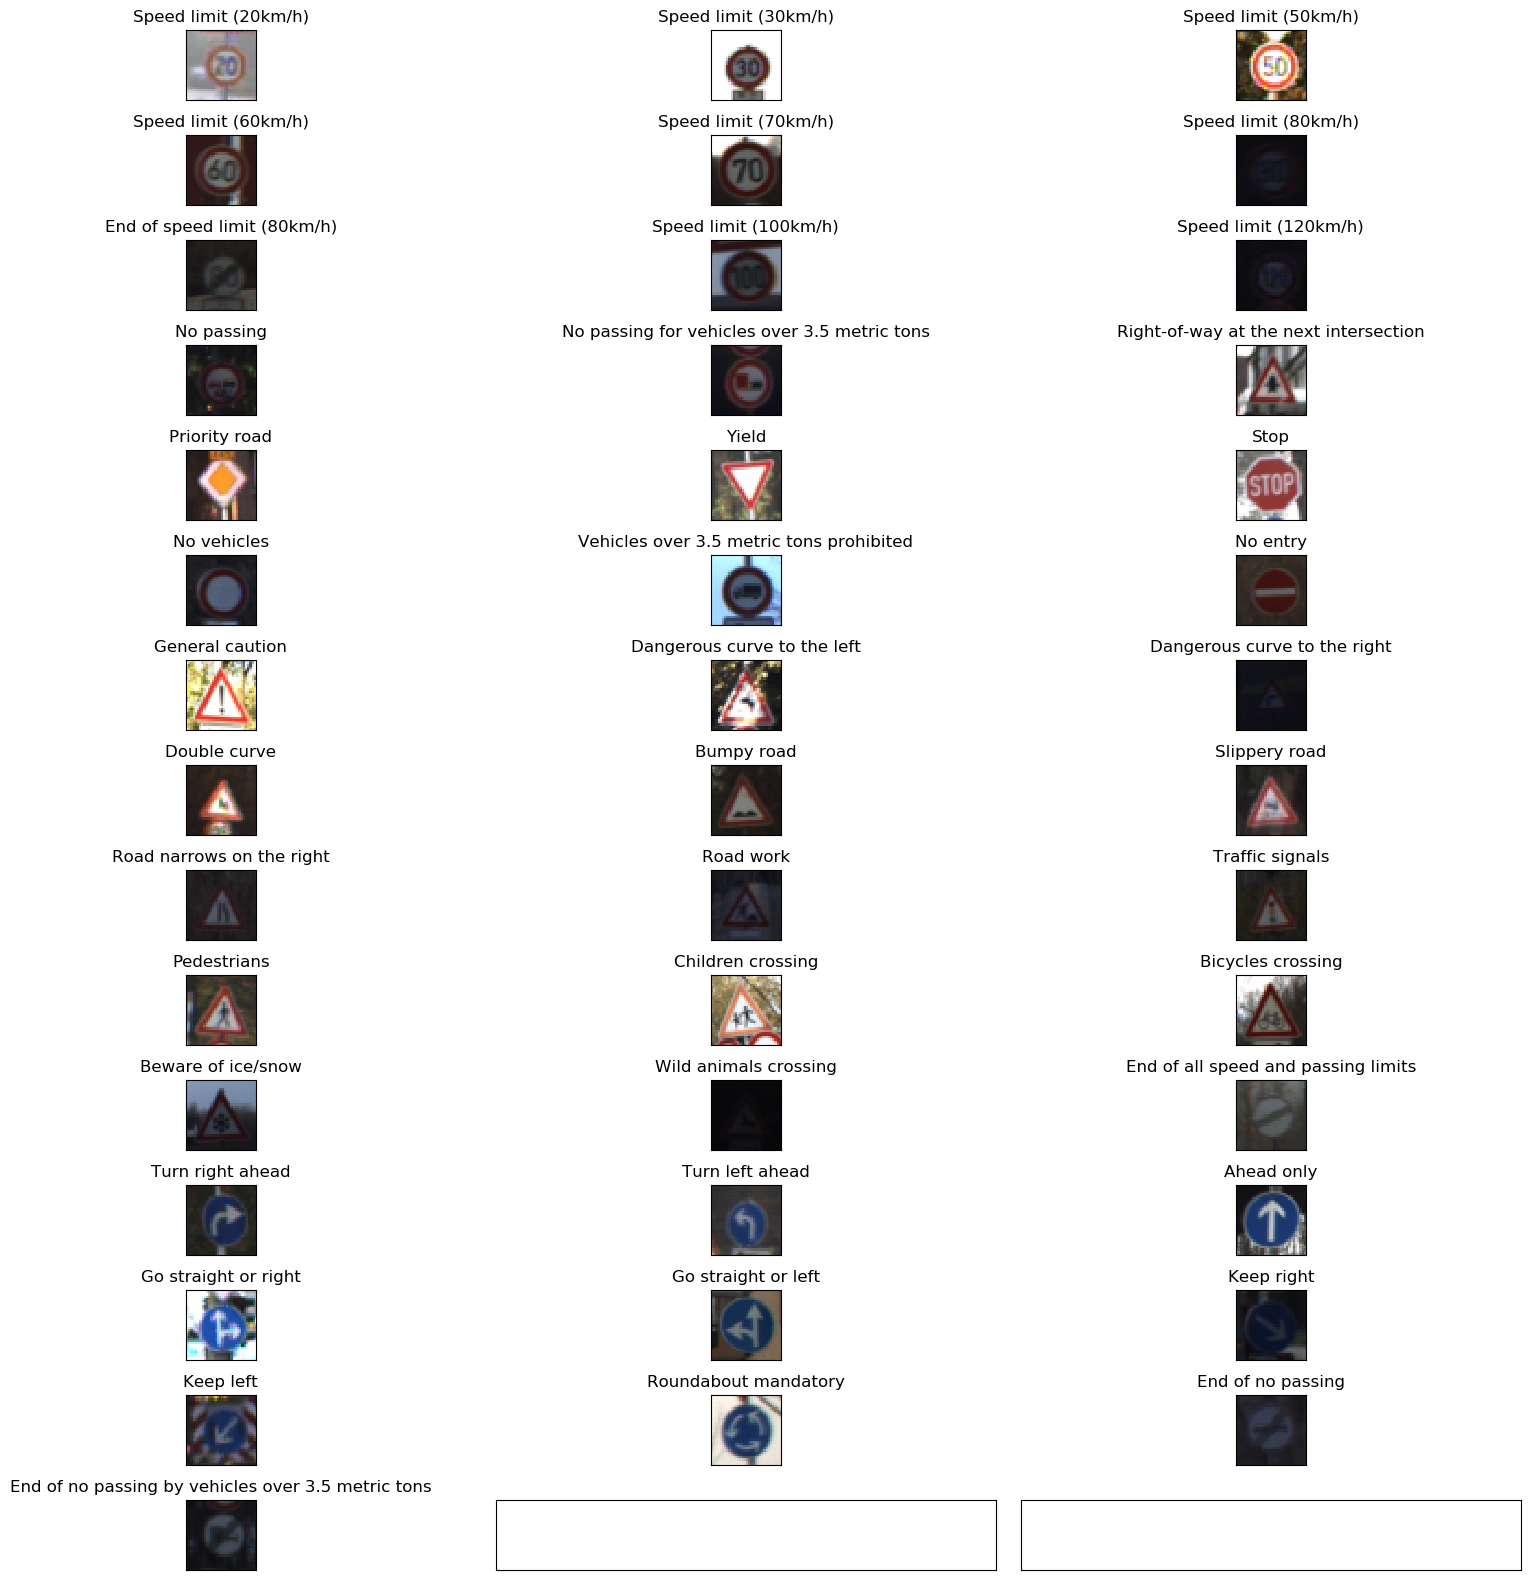

In [7]:
# Extract random traffic signs from the dataset with labels
def get_random_image_for_label(label, dataset, labels):
    rand_i = np.random.choice(np.where(labels==label)[0])
    return  dataset[rand_i]

def show_random_images_from_dataset(dataset, labels):
    fig, axes = plt.subplots(15, 3, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.5, wspace=0.05)

    for k, ax in enumerate(axes.flat):
        if k > 42:
            break
        img, label = get_random_image_for_label(k, dataset, labels), k
        ax.imshow(img)
        ax.set_title(signnames_dict[label])

    plt.show()

show_random_images_from_dataset(X_train, y_train)

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
## Note checking for missing dependecy
try:
    import imgaug as ia
except ImportError:
    raise Exception("Please install the 'imgaug' depdendecy in order to recreate the dataset.\n Use: pip install imgaug")

In [9]:
# Sampling logic
import math 
    
def create_sampling_indexes(current_batch_samples, max_samples):
    """ Returns a counter tellin in which position of the array of class types an image should be augmented """
        
    samples = int((max_samples / current_batch_samples - 1) * current_batch_samples)
    sampling_rate = current_batch_samples / (samples + 1e-5)

    # these are the limits over which I must generate a new sample
    sampling_thresholds = [math.floor(x * sampling_rate) for x in range(samples)]

    # dictionary containing all the indexes where you should sample and how many times a new sample must be created
    # if a sample is not preset in the list 0 will be returned which is ok
    return collections.Counter(sampling_thresholds)

In [10]:
## Dataset augmetation

import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
from collections import deque
from enum import Enum

class AugmentPolicy(Enum):
    DOUBLE = 1
    SAME_SIZE = 2
    THRESHOLD = 3

def create_augmented_dataset(augment_policy=AugmentPolicy.SAME_SIZE):
    ia.seed(1)
    
    # rotation, shearing and translation
    seq = iaa.SomeOf((1, 2), [
        iaa.Affine(rotate=(-15, 15)),
        iaa.Affine(shear=(-16, 16)),
        iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.15, 0.15)})
    ])
    

    X_augmented_train = deque()
    y_augmented_train = deque()
    
    max_count = max(signames_counter.values())
    aug_helper = {y: {'counter': create_sampling_indexes(count, max_count), 'index': -1} 
                  for y, count in signames_counter.items()}

    for img, label in zip(X_train, y_train):
        # Append original data
        X_augmented_train.append(img)
        y_augmented_train.append(label)    
        
        # Append augemnted data with custom policy
        if augment_policy == AugmentPolicy.SAME_SIZE:
            # new augment policy
            aug_helper[label]['index']+=1
            for _ in range(aug_helper[label]['counter'][aug_helper[label]['index']]):
                # do img augmentation X times by counter
                X_augmented_train.append(seq.augment_image(img))
                y_augmented_train.append(label)
        elif augment_policy == AugmentPolicy.DOUBLE:
            X_augmented_train.append(seq.augment_image(img))
            y_augmented_train.append(label)            
        elif augment_policy == AugmentPolicy.THRESHOLD:
            if label in signals_to_augment:
                # Augmented data
                X_augmented_train.append(seq.augment_image(img))
                y_augmented_train.append(label)

    X_augmented_train = np.asarray(X_augmented_train)
    y_augmented_train = np.asarray(y_augmented_train)
    
    return X_augmented_train, y_augmented_train

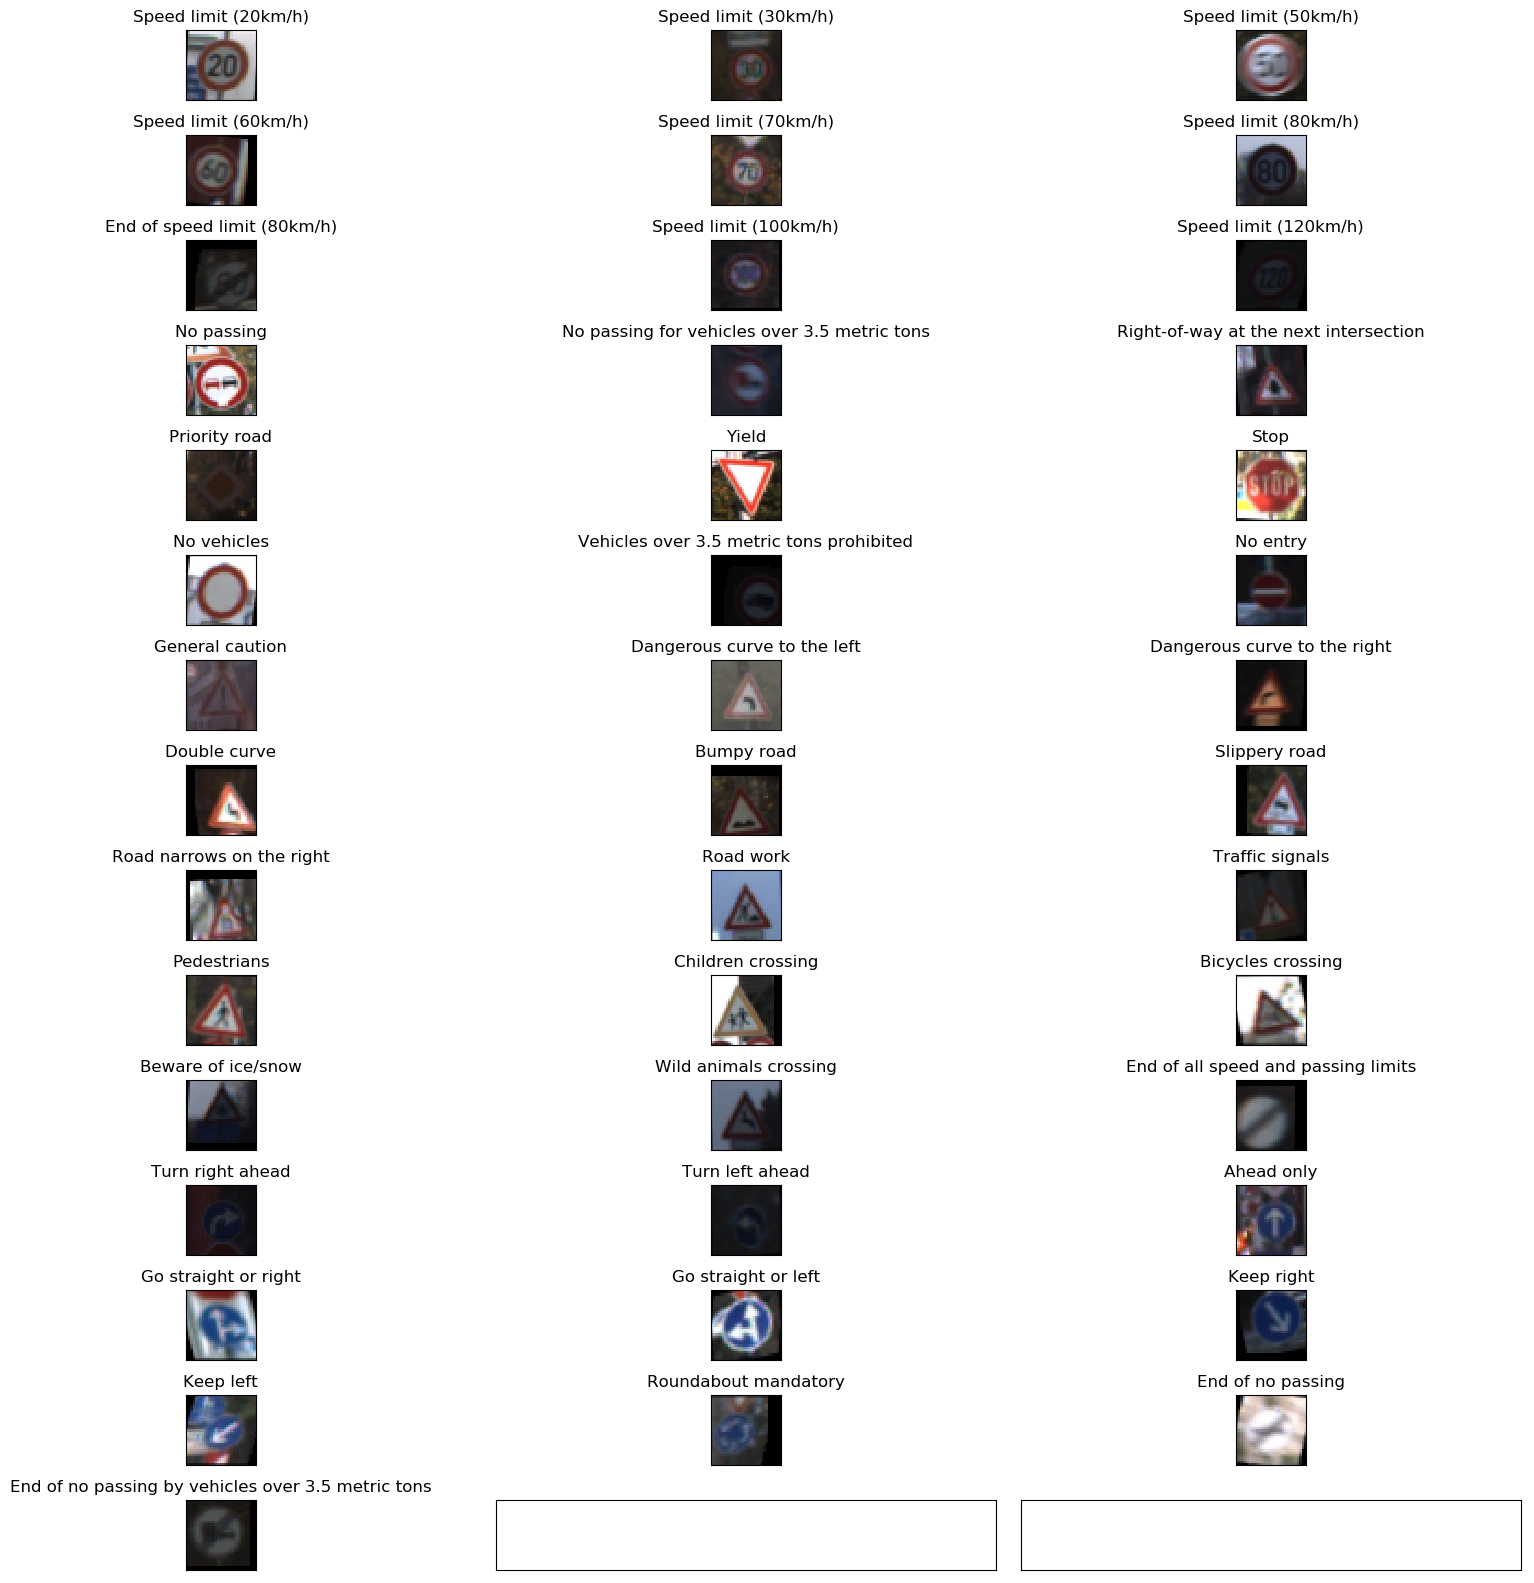

In [11]:
# try to opend the augmented data file
# if it does not exits create the dataset
# if it exsits and does contain data then load it
# otherwise check for the floag which forces the generation and create the dataset once again
# We are only going to augment data which has lables that don't have high frequencies

SHOULD_RECREATE = False

def write_dataset(dataset):
    with open(augmented_training_file, 'wb') as handle:
        pickle.dump(dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

try:
    with open(augmented_training_file, mode='rb') as f:
        if SHOULD_RECREATE:
            # create and save even if already exists
            X, y = create_augmented_dataset()
            augmented_train = {'features': X, 'labels': y }
            write_dataset(augmented_train)
        else:
            # return existing dataset 
            augmented_train = pickle.load(f)
except FileNotFoundError:
    # Create and save if missing
    X, y = create_augmented_dataset()
    augmented_train = {'features': X, 'labels': y }
    write_dataset(augmented_train)

X_train_augmented, y_augmented_train = augmented_train['features'], augmented_train['labels']

# Display some random samples from the augmented datast
show_random_images_from_dataset(X_train_augmented, y_augmented_train)

In [12]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

## Create an augmented dataset to be utilized.
## Only the training dataset should be augmdnted. Validation and test are to be left as they are.
    
## Dataset grayscaling
def grayscale_dataset(dataset):
    """ Grayscale the entire dataset """
    seq = iaa.Sequential([
        iaa.Grayscale(alpha=(1.0, 1.0))
    ])
    return seq.augment_images(dataset)

def tf_dataset_standardization(images):
    """ Returns a dataset of images with Mean=0 and Stdev=1 """
    results = deque()
    for image in images:
        norm_image = (image - image.mean()) / image.std()
        results.append(norm_image)

    return np.array(results)


def data_preprocessing(X_train, X_valid, X_test, y_train, X_train_augmented, y_augmented_train, grayscaled, tf_standardized, augmented):
    ## Use augmented dataset
    if augmented:
        # only the training set should be augmented
        X_train = X_train_augmented
        y_train = y_augmented_train
        
    if grayscaled:
        X_train = grayscale_dataset(X_train)
        X_valid = grayscale_dataset(X_valid)
        X_test = grayscale_dataset(X_test) 
        
    if tf_standardized:
        X_train = tf_dataset_standardization(X_train)
        X_valid = tf_dataset_standardization(X_valid)
        X_test = tf_dataset_standardization(X_test)
    
    return X_train, X_valid, X_test, y_train

### Model Architecture

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def setup_lenet_params():
    image_shape_train = X_train[0].shape
    image_shape_valid = X_valid[0].shape
    image_shape_test = X_test[0].shape

    assert image_shape_train == image_shape_valid == image_shape_test, "Shapes must match accross the entire dataset"

    input_depth = image_shape_train[2] if len(image_shape_train) == 3 else 1
    output_classes = n_classes
    return input_depth, output_classes


def LeNet(x, input_depth, output_classes):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    def activation_function(x):
        return tf.nn.tanh(x)
    
    tensor_names = []
    print('Tensor names')
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = activation_function(conv1)
    print('1', conv1.name)
    tensor_names.append(conv1.name)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print('2', conv1.name)
    tensor_names.append(conv1.name)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = activation_function(conv2)
    print('3', conv2.name)
    tensor_names.append(conv2.name)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = activation_function(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = activation_function(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, output_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(output_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, tensor_names

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## INPUT PARAMETERS SETUP

def setup_mode_with_data(X_train, X_valid, X_test, y_train, X_train_augmented, y_augmented_train, grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata):

    # This step setups the data with required params
    X_train, X_valid, X_test, y_train = data_preprocessing(X_train, X_valid, X_test, y_train, X_train_augmented, y_augmented_train, grayscaled, tf_standardized, augmented)

    input_depth, output_classes = setup_lenet_params()


    x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, output_classes)

    rate = learning_rata

    logits, tensor_names = LeNet(x, input_depth, output_classes)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)


    # Model evaluation
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples
    
    return X_train, X_valid, X_test, y_train, training_operation, x, y, evaluate, saver, logits, tensor_names

In [15]:
# Model saving and realoading utils

TRAINED_MODELS_DIR = 'trained-models'
TRAINING_HISTORY_FILE = '%s/training_history.pickle' % TRAINED_MODELS_DIR

def make_model_name(grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata, tag):
    return ".".join(["%s_%s"%(x1, x2) for x1, x2 in [
        ('tf_stand', tf_standardized),
        ('grayed', grayscaled),
        ('agument', augmented),
        ('epochs', epochs),
        ('batch', batch_size),
        ('lrate', learning_rata),
        ('tag', tag)
    ]])

def update_training_history(result):
    try:
        with open(TRAINING_HISTORY_FILE, 'rb') as handle:
            base_data = pickle.load(handle)
    except Exception:
        base_data = []
    
    base_data.append(result)
    
    with open(TRAINING_HISTORY_FILE, 'wb') as handle:
        pickle.dump(base_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

def read_training_history():
    with open(TRAINING_HISTORY_FILE, 'rb') as handle:
         return pickle.load(handle)

In [16]:
# Run training

def start_training_session(X_train, X_valid, X_test, y_train, y_valid, training_operation, x, y, evaluate, saver, tensor_names,
                           grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata, tag):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        accuracy_history = []
        model_name = make_model_name(grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata, tag)

        print("Training '%s' ..." % model_name)
        print()
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_valid, y_valid)
            accuracy_history.append(validation_accuracy)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.4f}".format(validation_accuracy))
            print()


        update_training_history((model_name, accuracy_history, tensor_names))
        model_name = './%s/%s' % (TRAINED_MODELS_DIR, model_name)
        saver.save(sess, model_name)
        print("Model '%s' saved" % model_name)

In [17]:
# Globals used to restore network
last_saver = None
g_evaluate = None
g_logits = None
g_x = None

In [ ]:
# Batch simulations and run!
import itertools

def make_hyperparameters():
    GRAYSCALED = [True]
    TF_STANDARDIZED = [True]
    AUGMENTED = [True, False]
    
    EPOCHS = [50]
    BATCH_SIZE = [128]
    LEARNING_RATE = [0.001]
    # find a way to combine all of them and create somthing
    
    combinations = itertools.product(GRAYSCALED, TF_STANDARDIZED, AUGMENTED, EPOCHS, BATCH_SIZE, LEARNING_RATE)
    for combination in combinations:
        grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata = combination
        yield grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata, 'combinations'

def start_with_params(grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata, tag):
    """ Setup and run the entire process with hyperprameters. """
    pX_train, pX_valid, pX_test, py_train, training_operation, x, y, evaluate, saver, logits, tensor_names = setup_mode_with_data(X_train, X_valid, X_test, y_train, X_train_augmented, y_augmented_train, 
                                                       grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata)
    print("Training data size X and y", pX_train.shape, py_train.shape)
    # Store it for later usage
    global last_saver
    global g_evaluate
    global g_logits
    global g_x
    last_saver = saver
    g_evaluate = evaluate
    g_logits = logits
    g_x = x
    
    start_training_session(pX_train, pX_valid, pX_test, py_train, y_valid, training_operation, x, y, evaluate, saver, tensor_names,
                           grayscaled, tf_standardized, augmented, epochs, batch_size, learning_rata, tag)
    

def run_hypersearch():
    """ Trains models with different hyperparameters"""
    for hypermarameters in make_hyperparameters():
        print("Using hypermarameters: %s" % str(hypermarameters))
        print()
        start_with_params(*hypermarameters)

def run_best_match():
    """ Train the model with the best hyperparameters liste below. """
    start_with_params(
        grayscaled=True, 
        tf_standardized=True, 
        augmented=False, 
        epochs=50, 
        batch_size=128, 
        learning_rata=0.001,
        tag='final_result'
    )

#run_hypersearch()
run_best_match()

In [19]:
# Print all training history
#read_training_history()

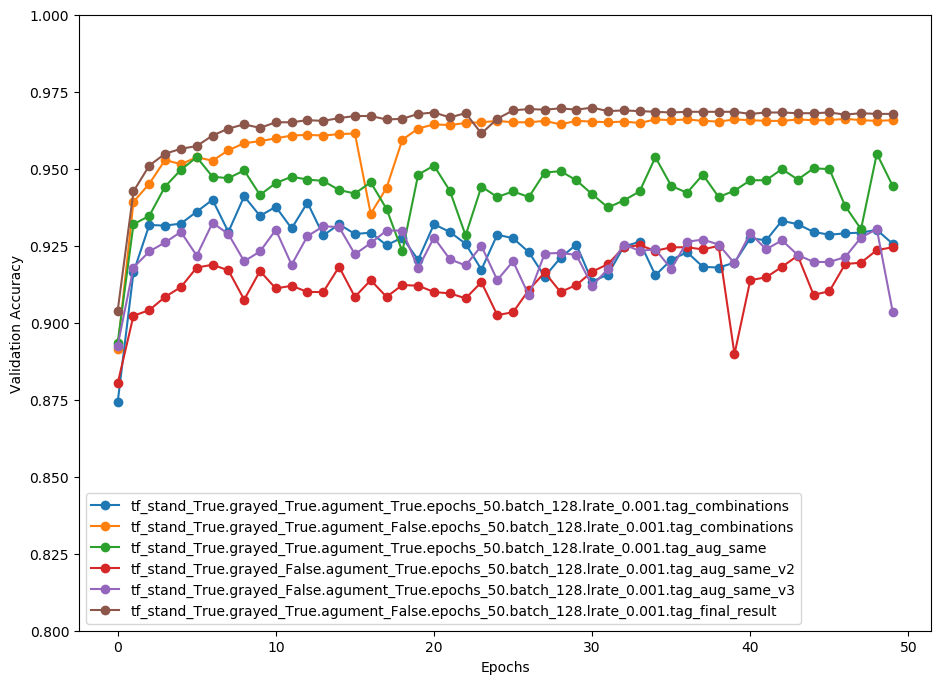

In [58]:
new_data = []

plt.figure(figsize=(11, 8))
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

axes = plt.gca()
axes.set_ylim([0.8, 1])

model_name_to_tensor_names_mapping = {}

for name, data, tensor_names in read_training_history():
    model_name_to_tensor_names_mapping[name] = tensor_names
    new_data.append((name, data[-1], data))
    plt.plot([x for x in range(len(data))], data, '-o', label=name)

plt.legend()
plt.show()

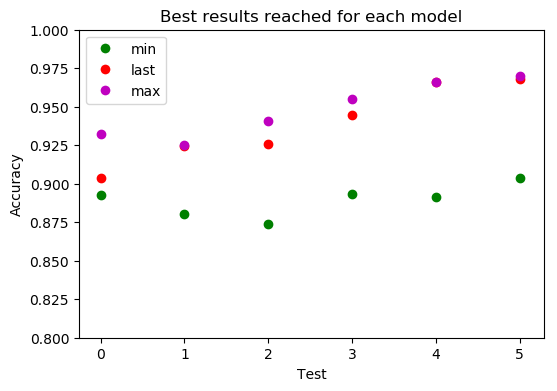

0: 0.9036 - tf_stand_True.grayed_False.agument_True.epochs_50.batch_128.lrate_0.001.tag_aug_same_v3
1: 0.9245 - tf_stand_True.grayed_False.agument_True.epochs_50.batch_128.lrate_0.001.tag_aug_same_v2
2: 0.9256 - tf_stand_True.grayed_True.agument_True.epochs_50.batch_128.lrate_0.001.tag_combinations
3: 0.9444 - tf_stand_True.grayed_True.agument_True.epochs_50.batch_128.lrate_0.001.tag_aug_same
4: 0.9658 - tf_stand_True.grayed_True.agument_False.epochs_50.batch_128.lrate_0.001.tag_combinations
5: 0.9678 - tf_stand_True.grayed_True.agument_False.epochs_50.batch_128.lrate_0.001.tag_final_result


In [77]:

sorted_data = sorted(new_data, key=lambda tup: tup[1])

y_mins = []
y_lasts = []
y_max = []

for name, _, data in sorted_data:
    min_y, last_y, max_y = min(data), data[-1], max(data)
    y_mins.append(min_y)
    y_lasts.append(last_y)
    y_max.append(max_y)

plt.figure(figsize=(6,4))
for x, y_min, y_last, y_max in zip(range(len(y_mins)), y_mins, y_lasts, y_max):
    plt.scatter(x, y_min, c='g')
    plt.scatter(x, y_last, c='r')
    plt.scatter(x, y_max, c='m')


legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='min',markerfacecolor='g', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='last',markerfacecolor='r', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='max',markerfacecolor='m', markersize=8),
]

plt.title('Best results reached for each model')
plt.xlabel('Test')
plt.ylabel('Accuracy')
plt.legend(handles=legend_elements)
axes = plt.gca()
axes.set_ylim([0.8, 1])
plt.show()

for k, (name, value, _) in enumerate(sorted_data):
    print("%s: %.4f - %s" %(k, value, name))

In [67]:
# FINAL MODEL EVALUATION
#raise ValueError("Avoiding accidental running. Comment when finished <3")
print(g_evaluate, last_saver)

# apply preprocessing to these sets :\
with tf.Session() as sess:
    last_saver.restore(sess, tf.train.latest_checkpoint('./trained-models/'))
    
    test_accuracy = g_evaluate(tf_dataset_standardization(grayscale_dataset(X_train)), y_train)
    print("Training Accuracy = {:.4f}".format(test_accuracy))
    test_accuracy = g_evaluate(tf_dataset_standardization(grayscale_dataset(X_valid)), y_valid)
    print("Validation Accuracy = {:.4f}".format(test_accuracy))
    test_accuracy = g_evaluate(tf_dataset_standardization(grayscale_dataset(X_test)), y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))

<function setup_mode_with_data.<locals>.evaluate at 0x117211950> <tensorflow.python.training.saver.Saver object at 0x11ac38d30>
Training Accuracy = 1.0000
Validation Accuracy = 0.9678
Test Accuracy = 0.9416


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

0 - Speed limit (20km/h)


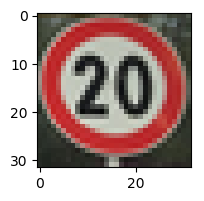

11 - Right-of-way at the next intersection


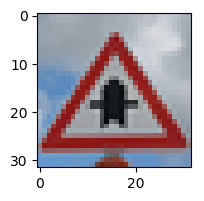

13 - Yield


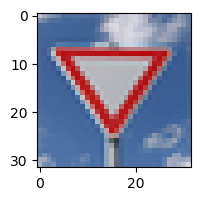

14 - Stop


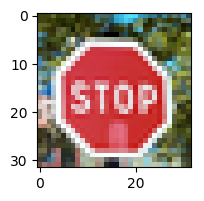

22 - Bumpy road


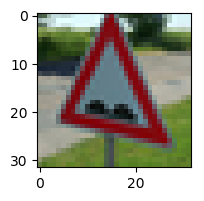

22 - Bumpy road


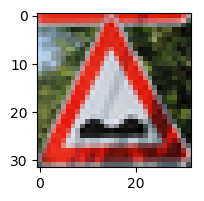

23 - Slippery road


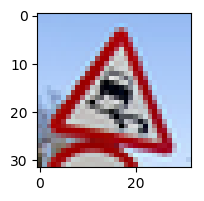

23 - Slippery road


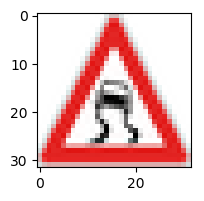

In [68]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import PIL
from PIL import Image

INTERNET_IMAGES = [
    # file_name, label, name
    ('0', 0, 'Speed limit (20km/h)'),
    ('11', 11, 'Right-of-way at the next intersection'),
    ('13', 13, 'Yield'),
    ('14', 14, 'Stop'),
    ('22', 22, 'Bumpy road'),
    ('22a', 22, 'Bumpy road'),
    ('23', 23, 'Slippery road'),
    ('23c', 23, 'Slippery road'),
]

def get_path_from(label):
    return './internet_samples/%s.png' % label

def load_resized(label):
    path = get_path_from(label)
    img = Image.open(path)
    img = img.resize((32, 32), PIL.Image.ANTIALIAS)
    return path, img


i_images = []
i_file_names = []
i_labels = []
i_label_names =[]
for file_name, label, name in INTERNET_IMAGES:
    path ,img = load_resized(file_name)
    i_file_names.append(file_name)
    i_images.append(np.array(img)[:,:,:3])
    i_labels.append(label)
    i_label_names.append(name)

i_images = np.array(i_images)

# Apply the same processing pipeline
processed_images = tf_dataset_standardization(grayscale_dataset(i_images))


# Print all images original images in the datast
for index, image in enumerate(i_images):
    print("%s - %s" %(i_labels[index], i_label_names[index]))
    plt.figure(figsize=(2,2))
    plt.imshow(i_images[index])
    plt.show()

### Predict the Sign Type for Each Image

### Analyze Performance

In [24]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [25]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [69]:
# N° 1 augmented dataset
#SAVE_NAME = 'tf_stand_True.grayed_True.agument_True.epochs_50.batch_128.lrate_0.001.tag_aug_same'
#N° 1 
SAVE_NAME = 'tf_stand_True.grayed_True.agument_False.epochs_50.batch_128.lrate_0.001.tag_final_result'
RESTORE_NAME = "./trained-models/%s" % SAVE_NAME
IMPORT_GRAPH_NAME = "%s.meta"% RESTORE_NAME

In [70]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# tf_stand_True.grayed_False.agument_False.epochs_50.batch_128.lrate_0.001.tag_combinations
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    g_saver = tf.train.import_meta_graph(IMPORT_GRAPH_NAME)
    g_saver.restore(sess, RESTORE_NAME)
    passed = 0
    for img, label, file_name in zip(processed_images, i_labels, i_file_names):
        accuracy = g_evaluate([img], [label])
        if accuracy == 1.0:
            passed += 1
        print("Accuracy = {:.3f} -> {} [{}.png]".format(accuracy, signnames_dict[label], file_name))
    
    print()
    print("Total accuracy %.4f" %(passed/len(processed_images)))

Accuracy = 0.000 -> Speed limit (20km/h) [0.png]
Accuracy = 1.000 -> Right-of-way at the next intersection [11.png]
Accuracy = 1.000 -> Yield [13.png]
Accuracy = 1.000 -> Stop [14.png]
Accuracy = 0.000 -> Bumpy road [22.png]
Accuracy = 1.000 -> Bumpy road [22a.png]
Accuracy = 0.000 -> Slippery road [23.png]
Accuracy = 1.000 -> Slippery road [23c.png]

Total accuracy 0.6250


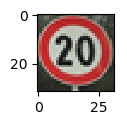

0 - Speed limit (20km/h)
[||||||||||||||||||||||||||||||||||||||| ] 0.9818 ->  1 - Speed limit (30km/h)
[                                        ] 0.0110 -> 18 - General caution
[                                        ] 0.0049 ->  0 - Speed limit (20km/h)
[                                        ] 0.0008 -> 29 - Bicycles crossing
[                                        ] 0.0006 -> 24 - Road narrows on the right



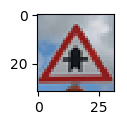

11 - Right-of-way at the next intersection
[||||||||||||||||||||||||||||||||||||||| ] 1.0000 -> 11 - Right-of-way at the next intersection
[                                        ] 0.0000 -> 28 - Children crossing
[                                        ] 0.0000 -> 30 - Beware of ice/snow
[                                        ] 0.0000 -> 34 - Turn left ahead
[                                        ] 0.0000 -> 27 - Pedestrians



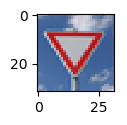

13 - Yield
[||||||||||||||||||||||||||||||||||||||| ] 1.0000 -> 13 - Yield
[                                        ] 0.0000 ->  8 - Speed limit (120km/h)
[                                        ] 0.0000 -> 33 - Turn right ahead
[                                        ] 0.0000 -> 28 - Children crossing
[                                        ] 0.0000 ->  9 - No passing



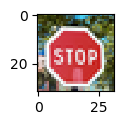

14 - Stop
[||||||||||||||||||||||||||||||||||||||| ] 0.9864 -> 14 - Stop
[                                        ] 0.0087 ->  1 - Speed limit (30km/h)
[                                        ] 0.0046 ->  4 - Speed limit (70km/h)
[                                        ] 0.0001 ->  2 - Speed limit (50km/h)
[                                        ] 0.0001 -> 18 - General caution



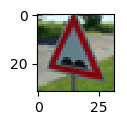

22 - Bumpy road
[|||||||||||||||||||||||||||||||||       ] 0.8398 -> 34 - Turn left ahead
[|||||                                   ] 0.1339 -> 28 - Children crossing
[                                        ] 0.0127 -> 30 - Beware of ice/snow
[                                        ] 0.0034 -> 12 - Priority road
[                                        ] 0.0029 -> 38 - Keep right



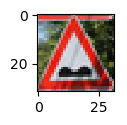

22 - Bumpy road
[||||||||||||||||||||                    ] 0.5058 -> 22 - Bumpy road
[|||||||||||||||||                       ] 0.4431 -> 26 - Traffic signals
[|                                       ] 0.0372 -> 20 - Dangerous curve to the right
[                                        ] 0.0081 -> 24 - Road narrows on the right
[                                        ] 0.0020 -> 30 - Beware of ice/snow



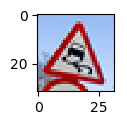

23 - Slippery road
[||||||||||||||||||||||||||||            ] 0.7203 -> 28 - Children crossing
[|||||||                                 ] 0.1865 -> 23 - Slippery road
[|                                       ] 0.0394 -> 11 - Right-of-way at the next intersection
[|                                       ] 0.0302 -> 30 - Beware of ice/snow
[                                        ] 0.0096 -> 24 - Road narrows on the right



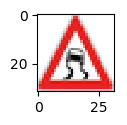

23 - Slippery road
[||||||||||||||||||||||||||||||||||      ] 0.8659 -> 23 - Slippery road
[||||                                    ] 0.1040 -> 30 - Beware of ice/snow
[                                        ] 0.0075 -> 28 - Children crossing
[                                        ] 0.0056 -> 19 - Dangerous curve to the left
[                                        ] 0.0052 -> 25 - Road work



In [71]:
# Predictions softmax prob
def print_perc_with_label(x, label="", width=40):
    if not (0.0 <= x <= 1.0):
        raise ValueError("Must be a number between 0 and 1")
    
    pw = int(x * width)
    spaces = width - pw
    print("[" + "|" * pw + " " * spaces + "] " + label)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    g_saver = tf.train.import_meta_graph(IMPORT_GRAPH_NAME)
    g_saver.restore(sess, RESTORE_NAME)
    
    prob = sess.run(tf.nn.softmax(g_logits), feed_dict={g_x: processed_images}) 
    result = sess.run(tf.nn.top_k(prob, k=5))

# using original images to view them best
for image, i_label, i_label_name, probs, labels in zip(i_images, i_labels, i_label_names, result[0], result[1]):
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    print("%s - %s" %(i_label, i_label_name))
    for prob, label in zip(probs, labels):
        print_perc_with_label(prob, "%.4f -> %2d - %s"% (prob, label, signnames_dict[label]))
    print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [72]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, session, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    global g_x
    activation = tf_activation.eval(session=session, feed_dict={g_x: image_input})

    print("Tensor '%s', shape '%s" % (tf_activation.name, str(activation.shape)))
    
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [73]:
# Step by step network analisys

def show_i_image(index):
    plt.figure(figsize=(1,1))
    plt.imshow(i_images[index])
    plt.title("%s - %s" %(i_labels[index], i_label_names[index]))
    plt.show()

def show_i_feature(index):
    
    model_name_to_tensor_names_mapping[SAVE_NAME]
    tensor_names = model_name_to_tensor_names_mapping[SAVE_NAME]

    image_input = [processed_images[index]]

    with tf.Session() as sess:
        g_saver.restore(sess, RESTORE_NAME)

        for k, tensor_name in enumerate(tensor_names):
            activation_t = tf.get_default_graph().get_tensor_by_name(tensor_name)
            outputFeatureMap(image_input, activation_t, sess, plt_num=(k + 1))
            plt.show()


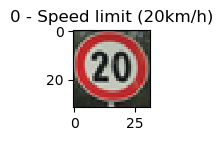

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


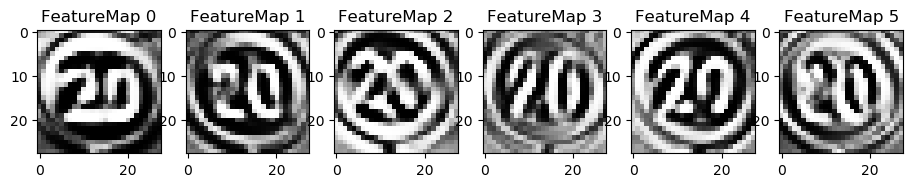

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


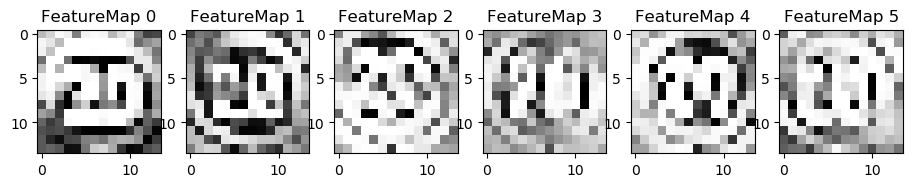

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


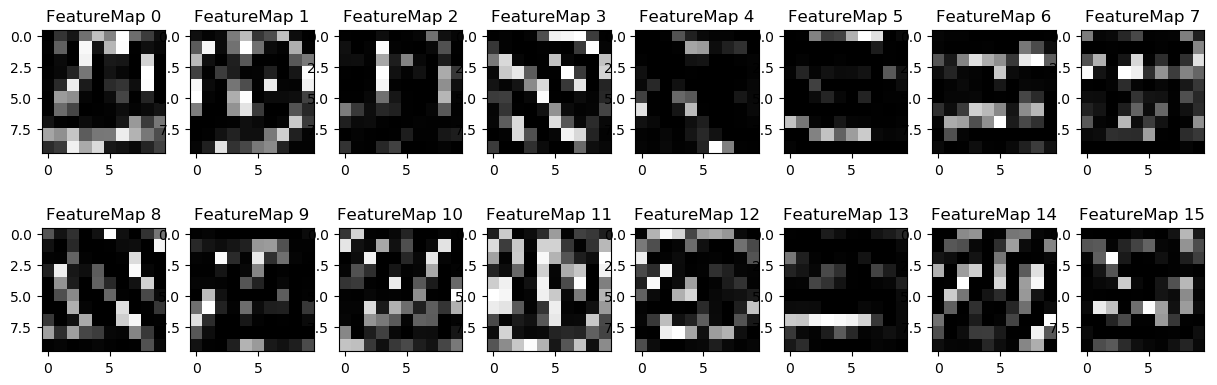

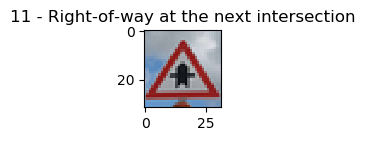

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


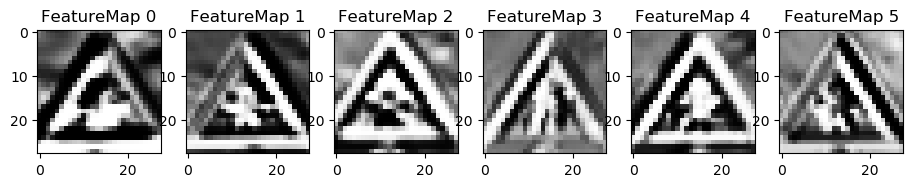

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


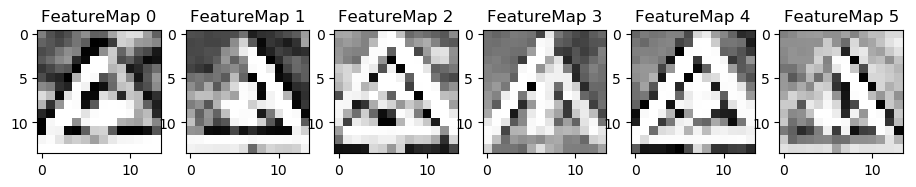

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


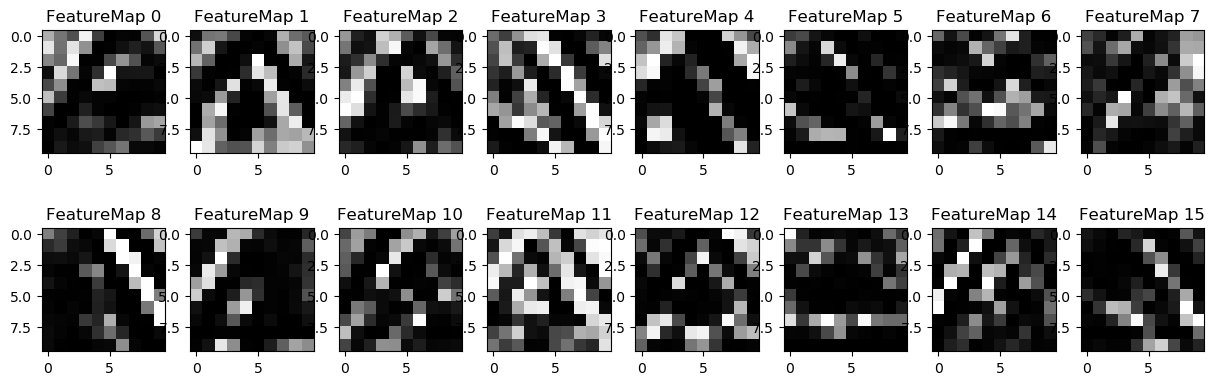

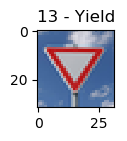

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


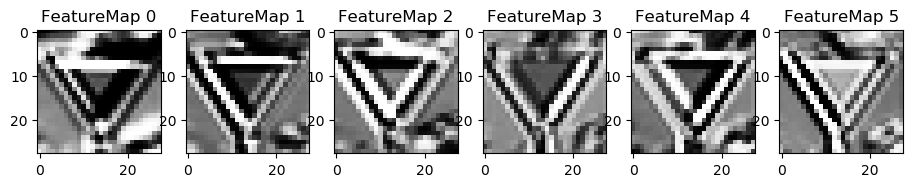

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


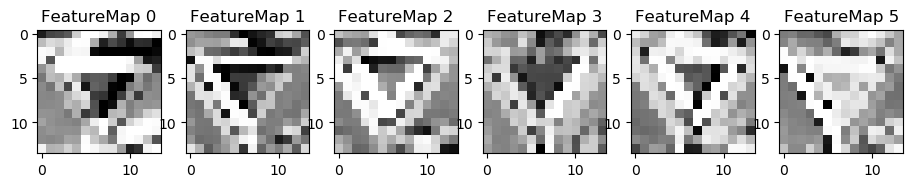

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


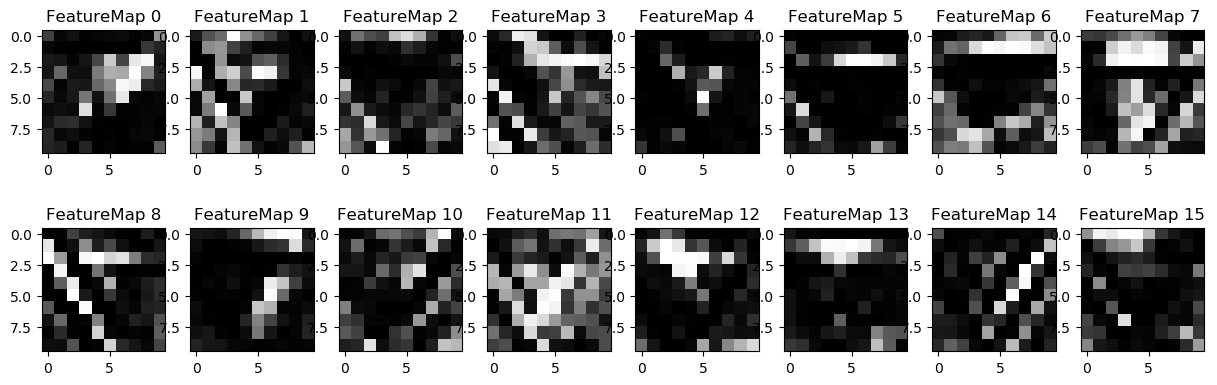

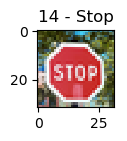

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


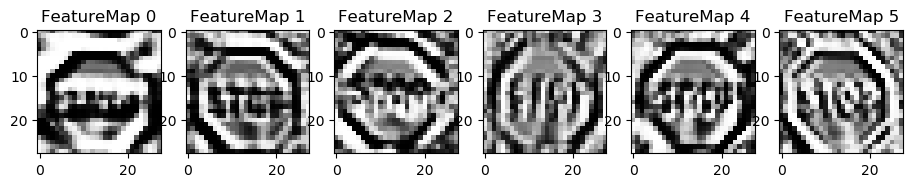

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


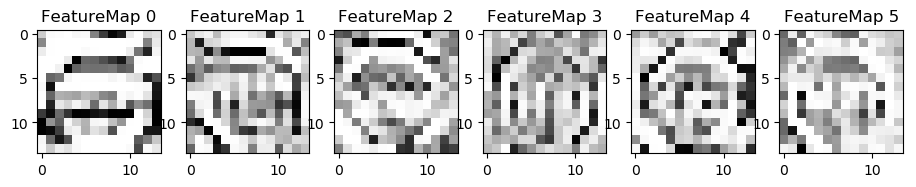

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


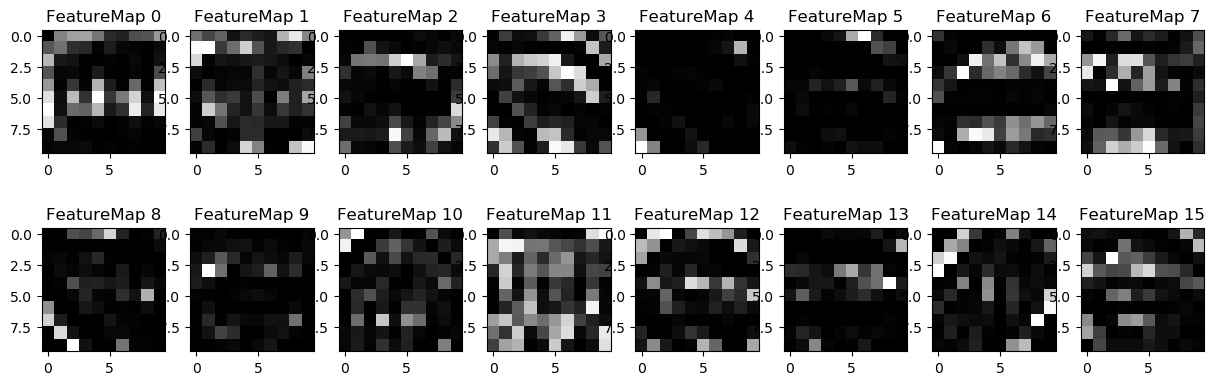

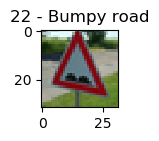

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


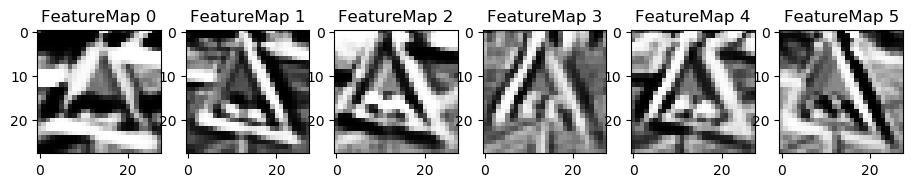

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


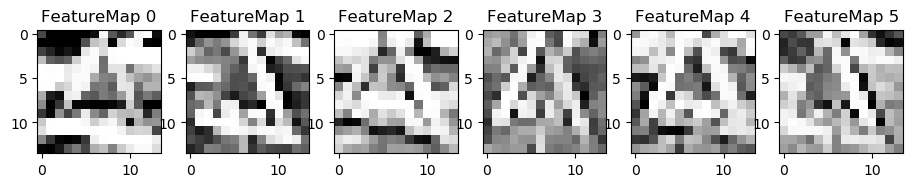

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


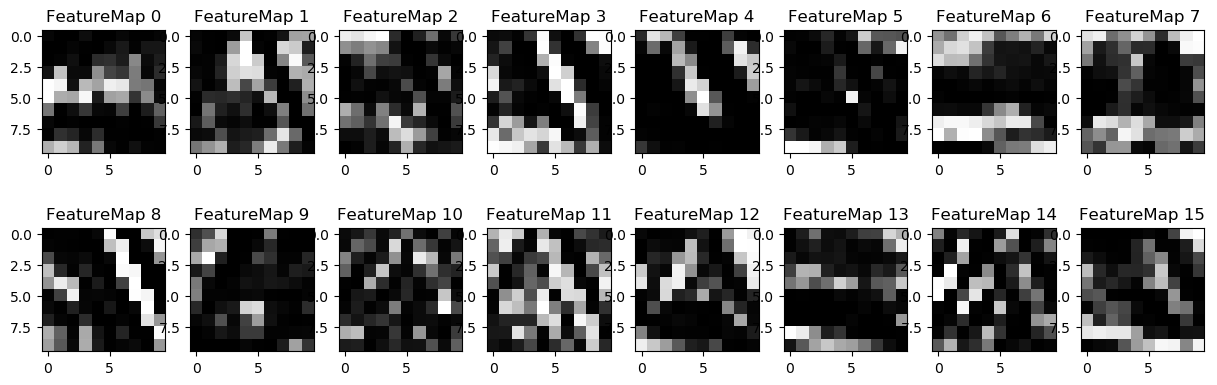

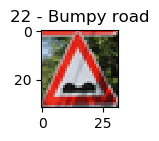

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


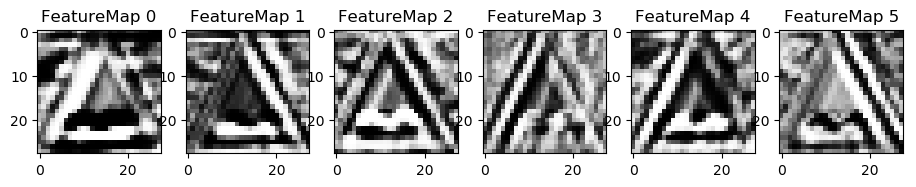

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


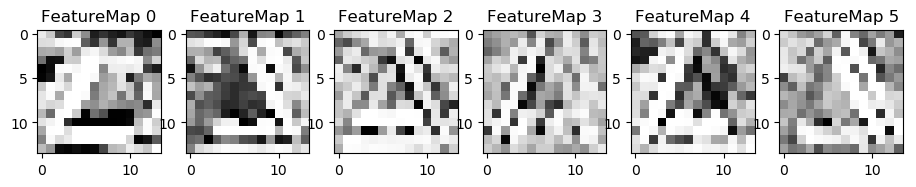

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


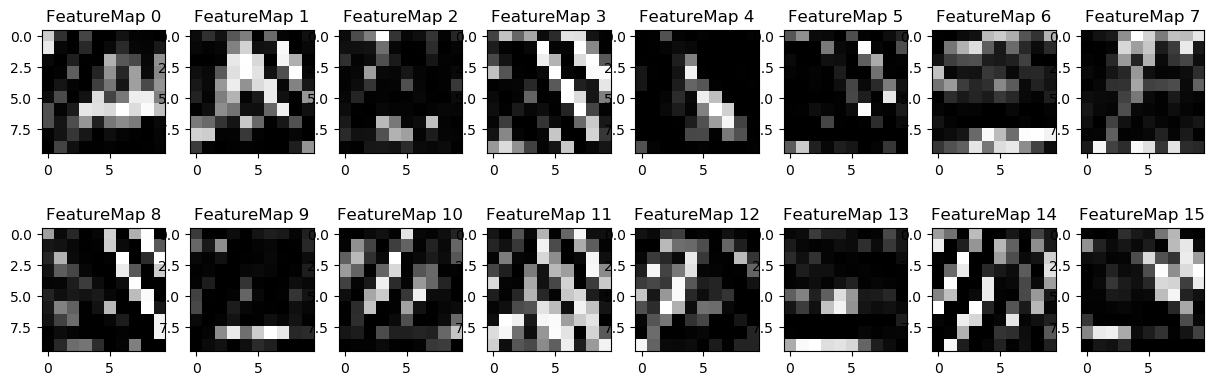

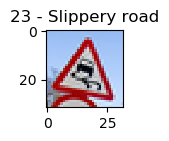

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


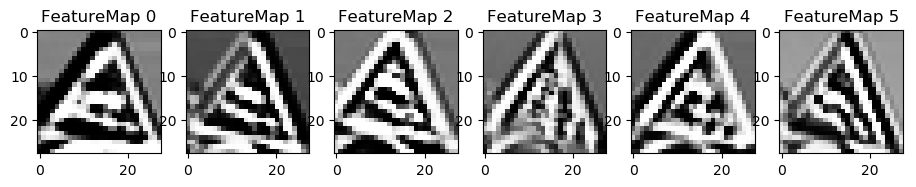

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


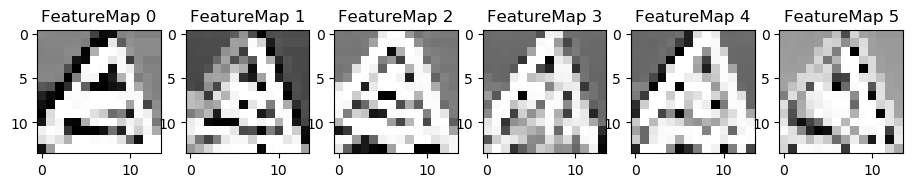

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


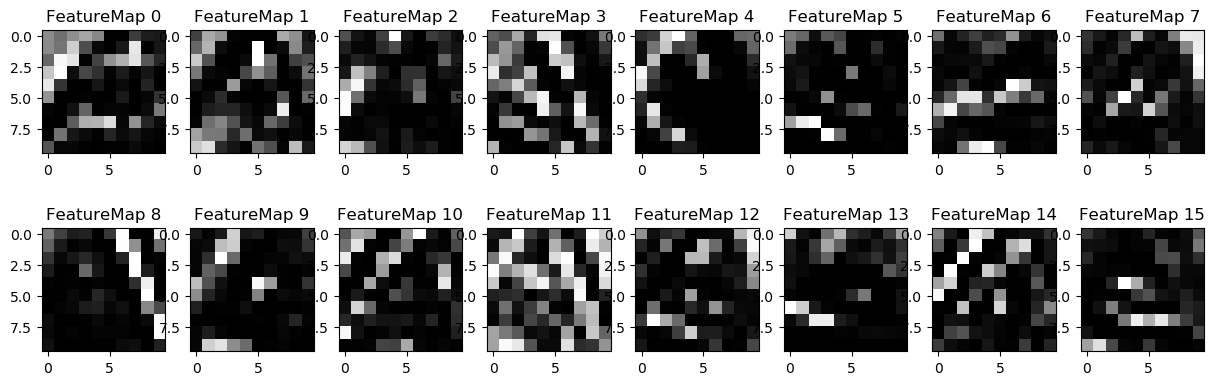

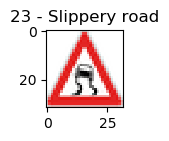

Tensor 'Tanh:0', shape '(1, 28, 28, 6)


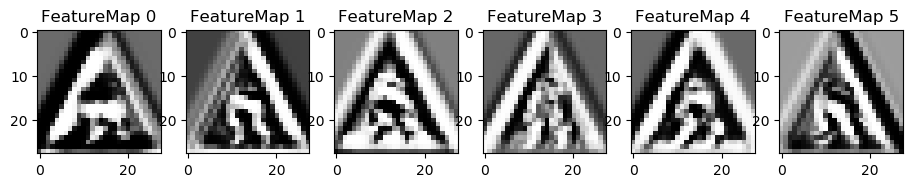

Tensor 'MaxPool:0', shape '(1, 14, 14, 6)


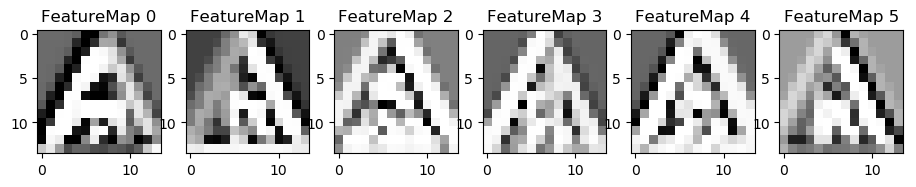

Tensor 'Tanh_1:0', shape '(1, 10, 10, 16)


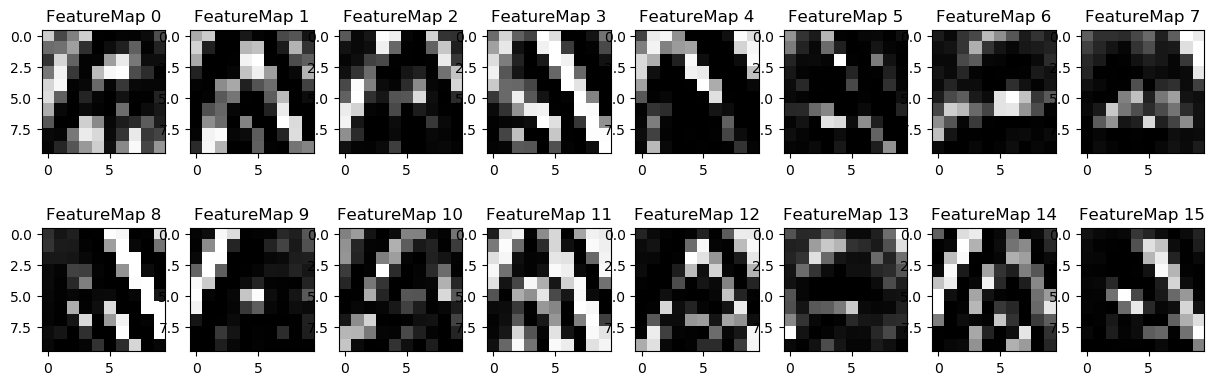

In [74]:
# For each image in the dataset show what the network saw

for image_index in range(len(INTERNET_IMAGES)):
    show_i_image(image_index)
    show_i_feature(image_index)